In [1]:
import yt
import numpy as np
from yt.visualization.volume_rendering.transfer_function_helper import TransferFunctionHelper
from yt.visualization.volume_rendering.render_source import VolumeSource
from IPython.display import Image

ds = yt.load("galaxy0030/galaxy0030")
#ds = yt.load_sample("IsolatedGalaxy") #with yt-4 this is an easier way to load sample data

yt : [INFO     ] 2020-03-24 14:32:04,053 Parameters: current_time              = 0.0060000200028298
yt : [INFO     ] 2020-03-24 14:32:04,055 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2020-03-24 14:32:04,056 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2020-03-24 14:32:04,059 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2020-03-24 14:32:04,062 Parameters: cosmological_simulation   = 0.0


Parsing Hierarchy : 100%|██████████| 173/173 [00:00<00:00, 14388.84it/s]
yt : [INFO     ] 2020-03-24 14:32:29,920 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2020-03-24 14:32:32,908 Projection completed
yt : [INFO     ] 2020-03-24 14:32:32,941 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-03-24 14:32:32,943 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-03-24 14:32:32,948 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-03-24 14:32:32,952 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-03-24 14:32:32,965 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



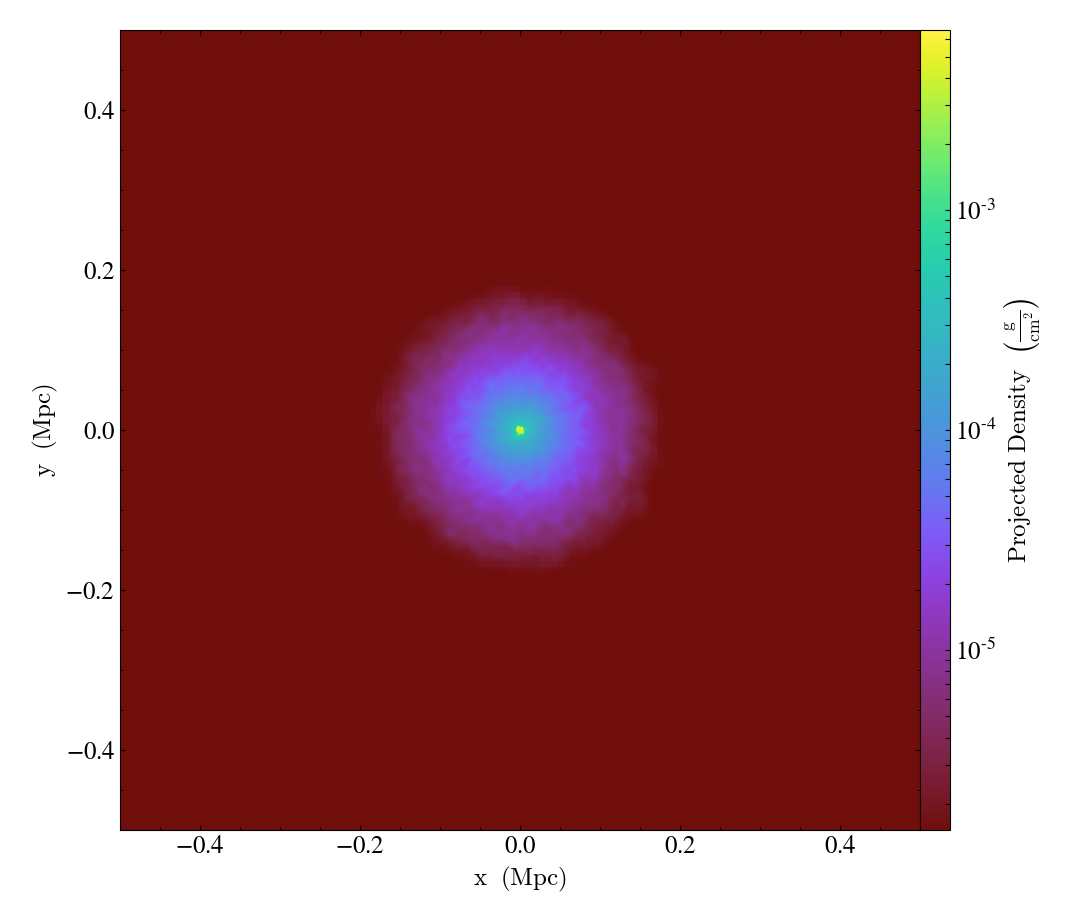

In [2]:
#First things first, let's just take a look at a projection of the whole box:
yt.ProjectionPlot(ds,"z","density")


In [ ]:
#Now we can try and step through a few things about volume rendering.

yt : [INFO     ] 2020-03-24 14:34:58,385 Setting default field to ('gas', 'density')
yt : [INFO     ] 2020-03-24 14:34:58,413 Rendering scene (Can take a while).
yt : [INFO     ] 2020-03-24 14:34:58,417 Creating volume


<Scene Object>:
Sources: 
    source_00: <Volume Source>:YTRegion (galaxy0030): , center=[  1.54300000e+24   1.54300000e+24   1.54300000e+24] cm, left_edge=[ 0.  0.  0.] cm, right_edge=[  3.08600000e+24   3.08600000e+24   3.08600000e+24] cm transfer_function:None
Camera: 
    <Camera Object>:
	position:[ 1.  1.  1.] code_length
	focus:[ 0.5  0.5  0.5] code_length
	north_vector:[ 0.81649658 -0.40824829 -0.40824829]
	width:[ 1.5  1.5  1.5] code_length
	light:None
	resolution:(512, 512)
Lens: <Lens Object>:
	lens_type:plane-parallel
	viewpoint:[-866025.33679714 -866025.33679714 -866025.33679714] code_length


/Users/stonnesen/Desktop/yt-conda/src/yt-git/yt/units/yt_array.py:1351: RuntimeWarning: invalid value encountered in log10
  out_arr = func(np.asarray(inp), out=out, **kwargs)
yt : [INFO     ] 2020-03-24 14:35:02,432 Creating transfer function
yt : [INFO     ] 2020-03-24 14:35:02,433 Calculating data bounds. This may take a while.  Set the TranferFunctionHelper.bounds to avoid this.


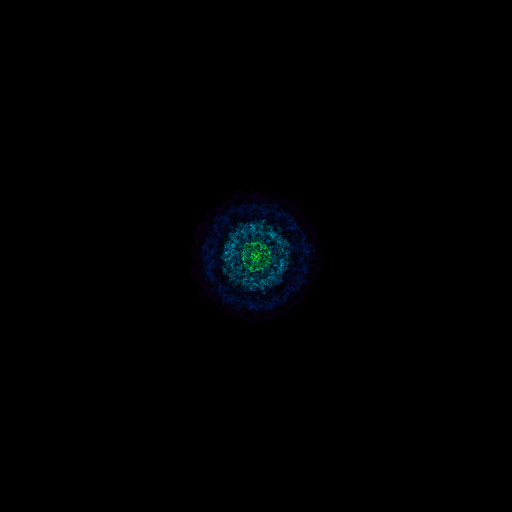

In [3]:
#The scene is a container class with information about both the source being rendered and the camera and lens
sc = yt.create_scene(ds) 
print (sc)
sc.show()

yt : [INFO     ] 2020-03-24 14:36:21,654 Setting default field to ('gas', 'density')
yt : [INFO     ] 2020-03-24 14:36:21,766 Rendering scene (Can take a while).
yt : [INFO     ] 2020-03-24 14:36:21,769 Creating volume
/Users/stonnesen/Desktop/yt-conda/src/yt-git/yt/units/yt_array.py:1351: RuntimeWarning: invalid value encountered in log10
  out_arr = func(np.asarray(inp), out=out, **kwargs)
yt : [INFO     ] 2020-03-24 14:36:24,807 Creating transfer function
yt : [INFO     ] 2020-03-24 14:36:24,809 Calculating data bounds. This may take a while.  Set the TranferFunctionHelper.bounds to avoid this.


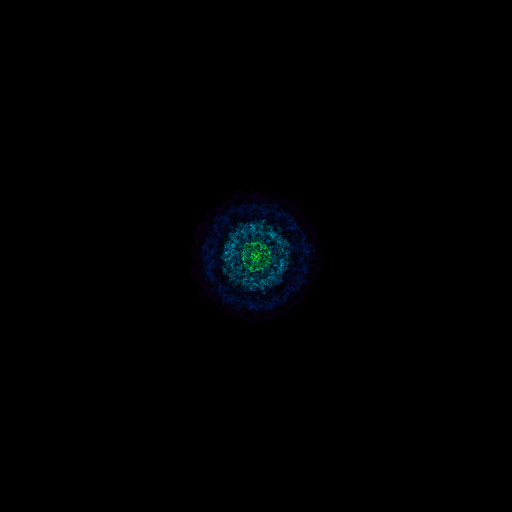

In [4]:
#What choices did this make for us?  Let's actually set a few things and see.
sc = yt.create_scene(ds)

#source = sc.sources['source_00']
source = sc[0]

source.set_field('density')
source.set_log(True)
sc.show()

yt : [INFO     ] 2020-03-24 14:37:11,125 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-03-24 14:37:11,127 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-03-24 14:37:11,130 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-03-24 14:37:11,140 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-03-24 14:37:11,146 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



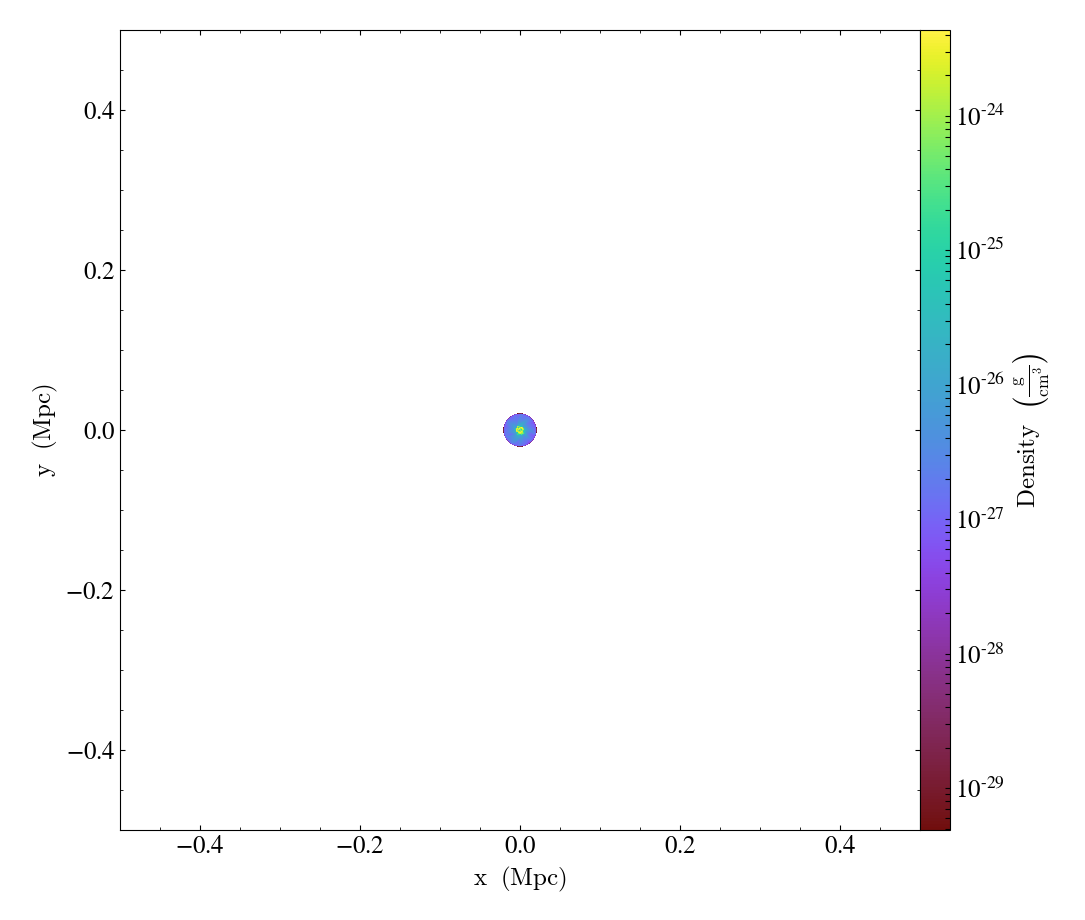

In [5]:
#Let's zoom in
data_source = ds.sphere([0.5,0.5,0.5],(20,'kpc'))
yt.SlicePlot(ds,"z","density",data_source=data_source)
#,center=[0.5,0.5,0.5],width=(20,'kpc'))
#

yt : [INFO     ] 2020-03-24 14:37:47,657 Projection completed
yt : [INFO     ] 2020-03-24 14:37:47,659 xlim = 0.475003 0.524997
yt : [INFO     ] 2020-03-24 14:37:47,662 ylim = 0.475003 0.524997
yt : [INFO     ] 2020-03-24 14:37:47,667 xlim = 0.475003 0.524997
yt : [INFO     ] 2020-03-24 14:37:47,692 ylim = 0.475003 0.524997
yt : [INFO     ] 2020-03-24 14:37:47,700 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



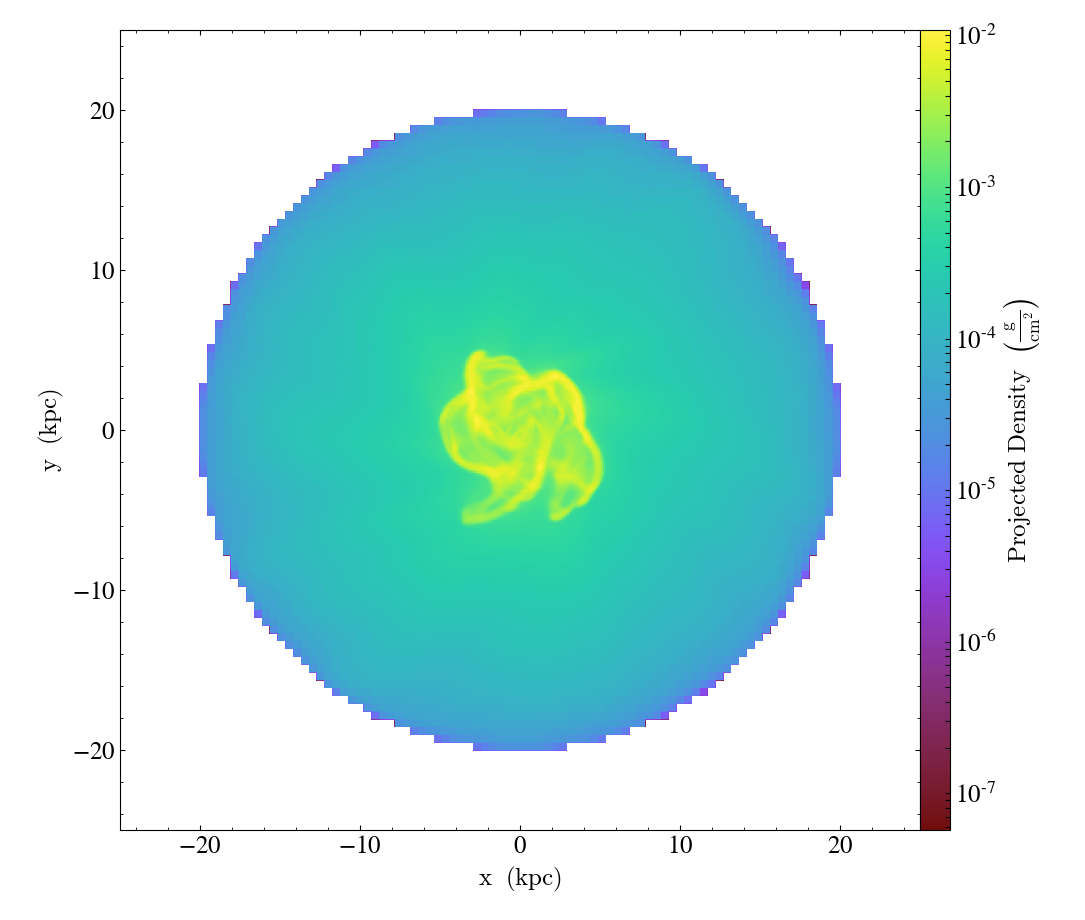

In [6]:
yt.ProjectionPlot(ds,"z","density",data_source=data_source,center=[0.5,0.5,0.5],width=(50,'kpc'))


yt : [INFO     ] 2020-03-24 14:38:38,784 Setting default field to ('gas', 'density')
yt : [INFO     ] 2020-03-24 14:38:38,892 Rendering scene (Can take a while).
yt : [INFO     ] 2020-03-24 14:38:38,895 Creating volume
/Users/stonnesen/Desktop/yt-conda/src/yt-git/yt/units/yt_array.py:1351: RuntimeWarning: invalid value encountered in log10
  out_arr = func(np.asarray(inp), out=out, **kwargs)
yt : [INFO     ] 2020-03-24 14:38:42,571 Creating transfer function
yt : [INFO     ] 2020-03-24 14:38:42,573 Calculating data bounds. This may take a while.  Set the TranferFunctionHelper.bounds to avoid this.


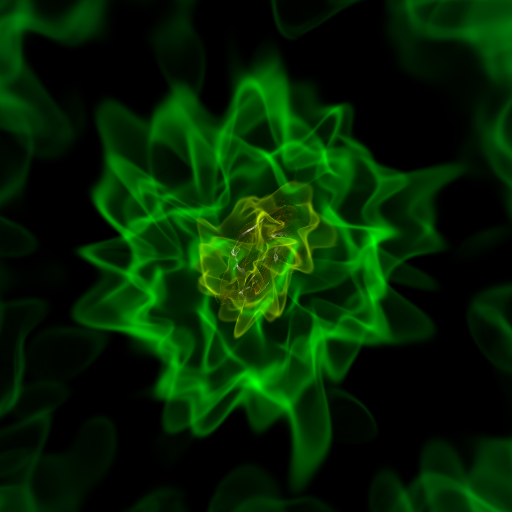

In [7]:
#Let's zoom in on the volume render
sc = yt.create_scene(ds)

sc.camera.set_width(ds.quan(50, 'kpc'))

#source = sc.sources['source_00']
source = sc[0]

source.set_field('density')
source.set_log(True)
sc.show()

yt : [INFO     ] 2020-03-24 14:39:30,460 Setting default field to ('gas', 'density')
yt : [INFO     ] 2020-03-24 14:39:30,573 Rendering scene (Can take a while).
yt : [INFO     ] 2020-03-24 14:39:30,576 Creating volume
/Users/stonnesen/Desktop/yt-conda/src/yt-git/yt/units/yt_array.py:1351: RuntimeWarning: invalid value encountered in log10
  out_arr = func(np.asarray(inp), out=out, **kwargs)
yt : [INFO     ] 2020-03-24 14:39:31,928 Creating transfer function
yt : [INFO     ] 2020-03-24 14:39:31,931 Calculating data bounds. This may take a while.  Set the TranferFunctionHelper.bounds to avoid this.


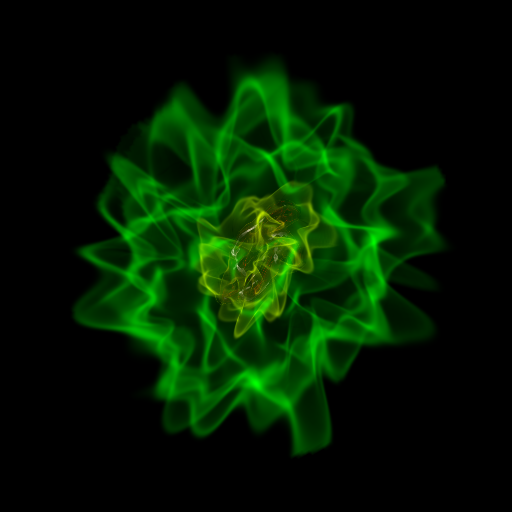

In [8]:
#I think I can use any region to make a scene
sc = yt.create_scene(data_source)

#print(sc) #can see what I have selected
sc.camera.set_width(ds.quan(50, 'kpc'))


source = sc[0]

source.set_field('density')
source.set_log(True)
sc.show()

#What has happened to the outer "layer" shown above?

In [ ]:
#Yikes, what am I looking at?  
#This looks terrible, probably because I just let yt highlight whatever.
#I can change this by manipulating the TransferFunction:
#https://yt-project.org/doc/visualizing/transfer_function_helper.html

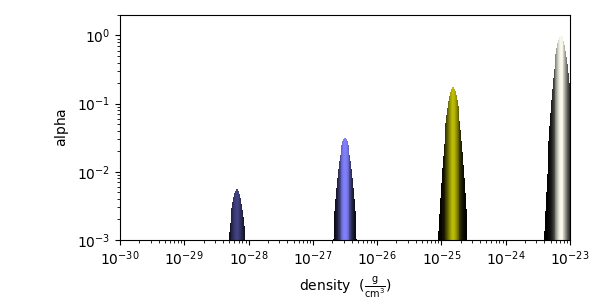

In [10]:

bounds = (1e-30,1e-23)
tfh2 = TransferFunctionHelper(ds)
tfh2.set_field('density')
tfh2.set_log(True)
tfh2.set_bounds((bounds))
tfh2.build_transfer_function()
tfh2.tf.add_layers(5,w=0.01) #Changing w changes the width of the gaussian in the TF
tfh2.plot()

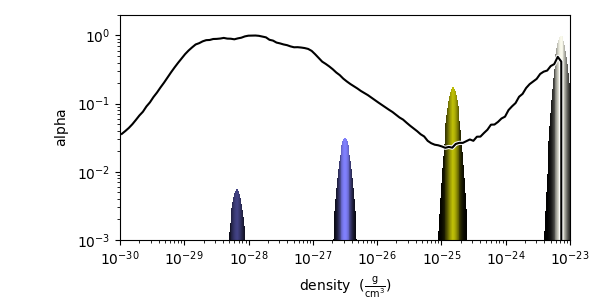

In [11]:
#overplot a distribution of the gas mass as a function of density:
#am I highlighting the densities I want people to see?
tfh2.plot(profile_field='cell_mass')


yt : [INFO     ] 2020-03-24 14:44:10,985 Setting default field to ('gas', 'density')
yt : [INFO     ] 2020-03-24 14:44:12,470 Rendering scene (Can take a while).
yt : [INFO     ] 2020-03-24 14:44:12,473 Creating volume
/Users/stonnesen/Desktop/yt-conda/src/yt-git/yt/units/yt_array.py:1351: RuntimeWarning: invalid value encountered in log10
  out_arr = func(np.asarray(inp), out=out, **kwargs)


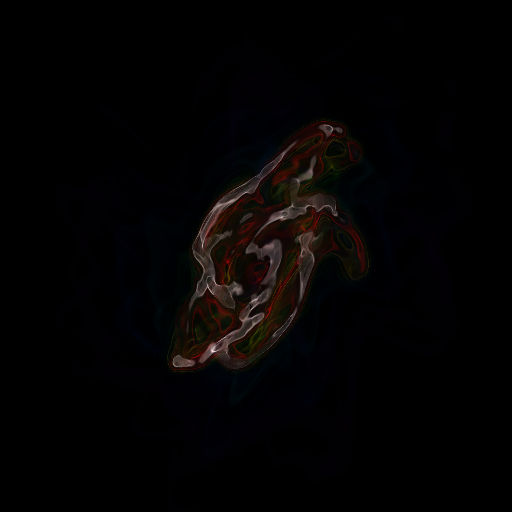

In [12]:
scall = yt.create_scene(ds)
source_all = scall[0]
scall.camera.set_width(ds.quan(20, 'kpc')) #I zoomed in even farther here for illustration
source_all.set_field('density')
source_all.set_log(True)

source_all.tfh.set_bounds((3e-27, 5e-24))
source_all.tfh.set_log(True)
source_all.tfh.grey_opacity = False #This is supposed to make underdense regions see-through

source_all.tfh.plot('transfer_function_tfhgofalse.png')
scall.show()


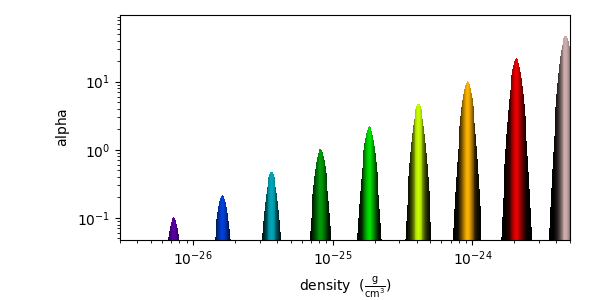

In [13]:
Image(filename="transfer_function_tfhgofalse.png")

yt : [INFO     ] 2020-03-24 14:45:42,763 Setting default field to ('gas', 'density')
yt : [INFO     ] 2020-03-24 14:45:44,355 Rendering scene (Can take a while).
yt : [INFO     ] 2020-03-24 14:45:44,358 Creating volume
/Users/stonnesen/Desktop/yt-conda/src/yt-git/yt/units/yt_array.py:1351: RuntimeWarning: invalid value encountered in log10
  out_arr = func(np.asarray(inp), out=out, **kwargs)


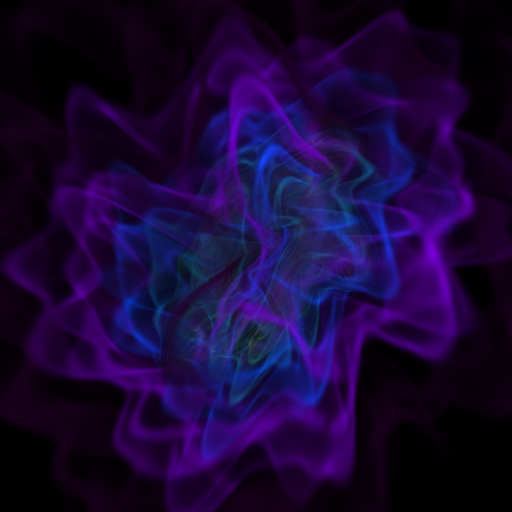

In [14]:
#Let's do everything the same, except change the opacity
scall = yt.create_scene(ds)
source_all = scall[0]
scall.camera.set_width(ds.quan(20, 'kpc'))
source_all.set_field('density')
source_all.set_log(True)


source_all.tfh.set_bounds((3e-27, 5e-24))
source_all.tfh.set_log(True)
source_all.tfh.grey_opacity = True #This is supposed to make underdense regions appear opaque

source_all.tfh.plot('transfer_function_tfhgotrue.png')

scall.show()


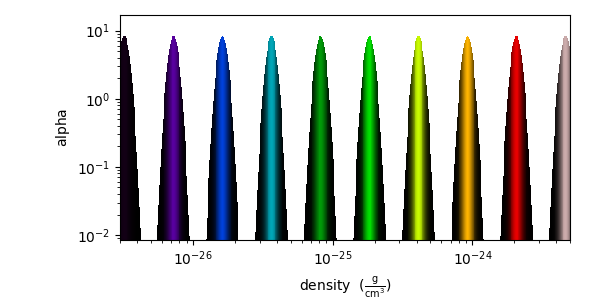

In [15]:

Image(filename="transfer_function_tfhgotrue.png")

yt : [INFO     ] 2020-03-24 14:49:26,600 Setting default field to ('gas', 'density')
yt : [INFO     ] 2020-03-24 14:49:28,465 Rendering scene (Can take a while).
yt : [INFO     ] 2020-03-24 14:49:28,469 Creating volume
/Users/stonnesen/Desktop/yt-conda/src/yt-git/yt/units/yt_array.py:1351: RuntimeWarning: invalid value encountered in log10
  out_arr = func(np.asarray(inp), out=out, **kwargs)


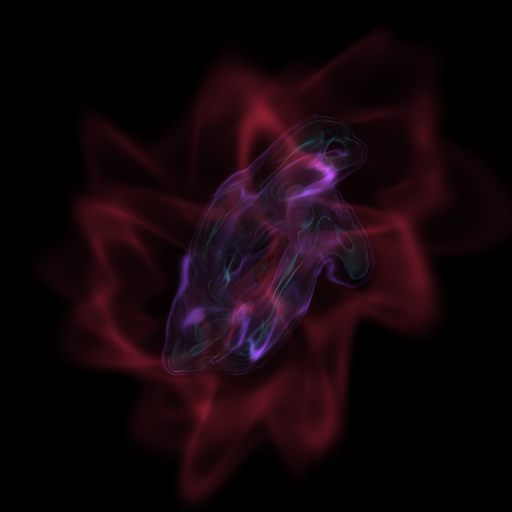

In [16]:
#I just like to choose exactly what densities I want to highlight:
scall = yt.create_scene(ds)
source_all = scall[0]
scall.camera.set_width(ds.quan(20, 'kpc'))
source_all.set_field('density')
source_all.set_log(True)
    
 
bounds = (7e-27,2e-23)
tf = yt.ColorTransferFunction(np.log10(bounds))
tf.sample_colormap(np.log10(1e-26),w=0.01,alpha=0.2,colormap='arbre')
tf.sample_colormap(np.log10(1e-25),w=0.01,colormap='arbre')
tf.sample_colormap(np.log10(1e-24),w=0.01,colormap='arbre')
tf.sample_colormap(np.log10(1e-23),w=0.01,colormap='arbre')
    
source_all.tfh.tf = tf
source_all.tfh.bounds = bounds

source_all.tfh.plot('transfer_function_arbre.png',profile_field='cell_mass')
scall.show()

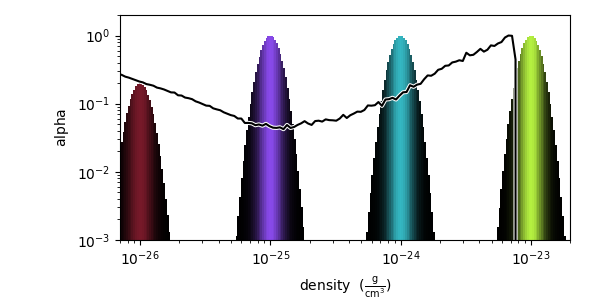

In [17]:
Image(filename="transfer_function_arbre.png")

yt : [INFO     ] 2020-03-24 14:52:21,154 Setting default field to ('gas', 'density')
yt : [INFO     ] 2020-03-24 14:52:23,020 Rendering scene (Can take a while).
yt : [INFO     ] 2020-03-24 14:52:23,023 Creating volume
/Users/stonnesen/Desktop/yt-conda/src/yt-git/yt/units/yt_array.py:1351: RuntimeWarning: invalid value encountered in log10
  out_arr = func(np.asarray(inp), out=out, **kwargs)


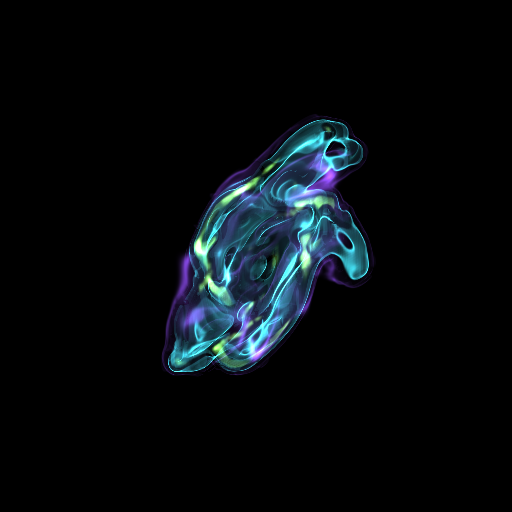

In [20]:
#Now that we have seen the volume rendering and the transfer function,
#we may want to change some of our selections
scall = yt.create_scene(ds)
source_all = scall[0]
scall.camera.set_width(ds.quan(20, 'kpc'))
source_all.set_field('density')
source_all.set_log(True)
    
 
bounds = (7e-27,2e-23)
tf = yt.ColorTransferFunction(np.log10(bounds))
#tf.sample_colormap(np.log10(1e-26),w=0.01,alpha=0.2,colormap='arbre')
tf.sample_colormap(np.log10(1e-25),w=0.01,alpha=0.2,colormap='arbre')
tf.sample_colormap(np.log10(1e-24),w=0.01,colormap='arbre')
tf.sample_colormap(np.log10(7e-24),w=0.01,colormap='arbre')
    
source_all.tfh.tf = tf
source_all.tfh.bounds = bounds
source_all.tfh.plot('transfer_function_selected.png',profile_field='cell_mass')
#scall.show()

# https://yt-project.org/doc/visualizing/volume_rendering.html#sigma-clip
#Because the brightness range in an image is scaled to match the range of emissivity values of underlying rendering, 
#if you have a few really high-emissivity points, they will scale the rest of your image to be quite dark. 
#sigma_clip = N can fix this by removing values that are more than N standard devs brighter than the mean of the image. 
scall.show(sigma_clip=5.0)

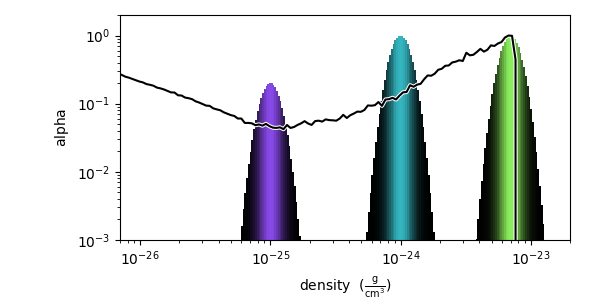

In [19]:
Image(filename="transfer_function_selected.png")

yt : [INFO     ] 2020-03-24 14:55:05,812 Setting default field to ('gas', 'density')
yt : [INFO     ] 2020-03-24 14:55:05,917 Rendering scene (Can take a while).
yt : [INFO     ] 2020-03-24 14:55:05,928 Creating volume
/Users/stonnesen/Desktop/yt-conda/src/yt-git/yt/units/yt_array.py:1351: RuntimeWarning: invalid value encountered in log10
  out_arr = func(np.asarray(inp), out=out, **kwargs)


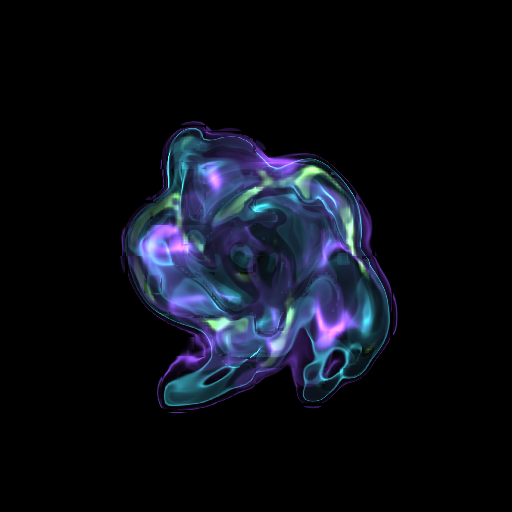

In [21]:
#We can mess with the camera to get the viewing angle we want
#Let's try and get the same view as our sliceplot from above!
scall = yt.create_scene(ds)
source_all = scall[0]
source_all.set_field('density')
source_all.set_log(True)
    
    #cam = scall.add_camera()
scall.camera.set_width(ds.quan(20,'kpc'))
scall.camera.position = ds.arr([0.5,0.5,0.95],'unitary')
scall.camera.focus = ds.arr([0.5,0.5,0.5],'unitary')
scall.camera.north_vector = np.array([0.0,1.0,0.0])
scall.camera.switch_orientation()#This step is required because north_vector is not a camera property!
#scall.camera.resolution = (2048,2048)

bounds = (7e-27,2e-23)
tf = yt.ColorTransferFunction(np.log10(bounds))
    #tf.sample_colormap(np.log10(1e-26),w=0.01,colormap='arbre')
tf.sample_colormap(np.log10(1e-25),w=0.01,alpha=0.5,colormap='arbre')
tf.sample_colormap(np.log10(1e-24),w=0.01,colormap='arbre')
tf.sample_colormap(np.log10(7e-24),w=0.01,colormap='arbre')
    
source_all.tfh.tf = tf
source_all.tfh.bounds = bounds

scall.show(sigma_clip=5.0)

yt : [INFO     ] 2020-03-24 14:55:58,358 Setting default field to ('gas', 'density')
yt : [INFO     ] 2020-03-24 14:55:59,784 Rendering scene (Can take a while).
yt : [INFO     ] 2020-03-24 14:55:59,789 Creating volume


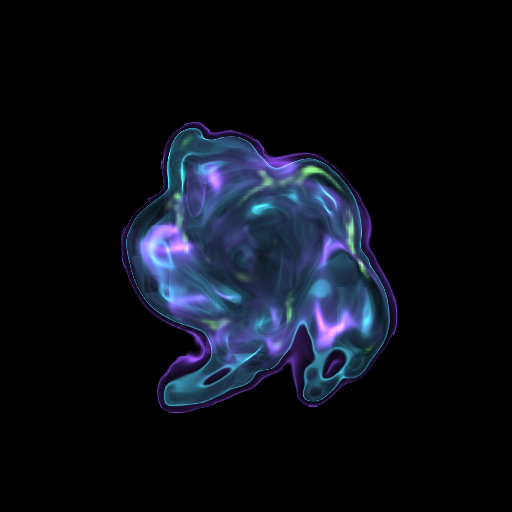

In [22]:
#Is the low resolution of this simulation messing with the rendering?

scall = yt.create_scene(ds)
source_all = scall[0]
source_all.set_field('density')
source_all.set_log(True)

# For this low resolution dataset it's very important to use interpolated
# vertex centered data to avoid artifacts. For high resolution data this
# setting may cause a substantial slowdown for marginal visual improvement.
source_all.set_use_ghost_zones(True)
    
scall.camera.set_width(ds.quan(20,'kpc'))
scall.camera.position = ds.arr([0.5,0.5,0.95],'unitary')
scall.camera.focus = ds.arr([0.5,0.5,0.5],'unitary')
scall.camera.north_vector = np.array([0.0,1.0,0.0])
scall.camera.switch_orientation()#Note this step is required because north_vector is not a camera property!
    
bounds = (7e-27,2e-23)
tf = yt.ColorTransferFunction(np.log10(bounds))
tf.sample_colormap(np.log10(1e-25),w=0.01,alpha=0.5,colormap='arbre')
tf.sample_colormap(np.log10(1e-24),w=0.01,colormap='arbre')
tf.sample_colormap(np.log10(7e-24),w=0.01,colormap='arbre')

source_all.tfh.tf = tf
source_all.tfh.bounds = bounds
source_all.tfh.grey_opacity=False
source_all.tfh.plot('transfer_function_gofalse.png')
scall.show(sigma_clip=5.0)

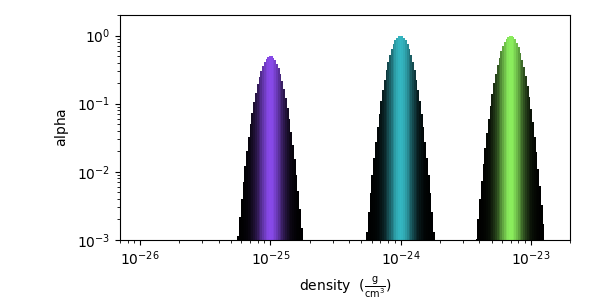

In [23]:
Image(filename="transfer_function_gofalse.png")

yt : [INFO     ] 2020-03-24 14:57:15,308 Setting default field to ('gas', 'density')
yt : [INFO     ] 2020-03-24 14:57:16,569 Rendering scene (Can take a while).
yt : [INFO     ] 2020-03-24 14:57:16,574 Creating volume


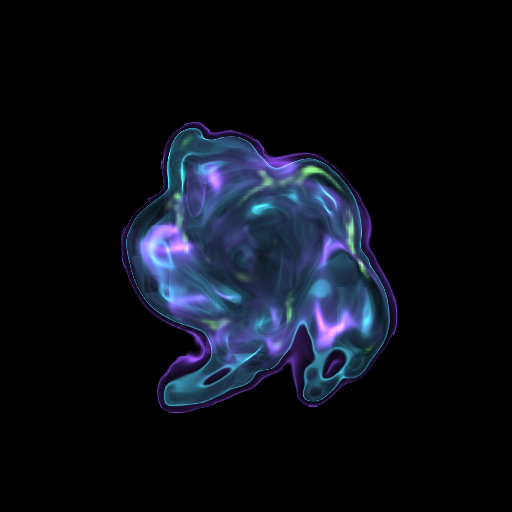

In [24]:
scall = yt.create_scene(ds)
source_all = scall[0]
source_all.set_field('density')
source_all.set_log(True)

# For this low resolution dataset it's very important to use interpolated
# vertex centered data to avoid artifacts. For high resolution data this
# setting may cause a substantial slowdown for marginal visual improvement.
source_all.set_use_ghost_zones(True)
    
scall.camera.set_width(ds.quan(20,'kpc'))
scall.camera.position = ds.arr([0.5,0.5,0.95],'unitary')
scall.camera.focus = ds.arr([0.5,0.5,0.5],'unitary')
scall.camera.north_vector = np.array([0.0,1.0,0.0])
scall.camera.switch_orientation()#Note this step is required because north_vector is not a camera property!
    
bounds = (7e-27,2e-23)
tf = yt.ColorTransferFunction(np.log10(bounds))
tf.sample_colormap(np.log10(1e-25),w=0.01,alpha=0.5,colormap='arbre')
tf.sample_colormap(np.log10(1e-24),w=0.01,colormap='arbre')
tf.sample_colormap(np.log10(7e-24),w=0.01,colormap='arbre')
    
source_all.tfh.tf = tf
source_all.tfh.bounds = bounds
source_all.tfh.grey_opacity=True #This is supposed to make underdense regions appear opaque
source_all.tfh.plot('transfer_function_gotrue.png')

scall.show(sigma_clip=5.0)

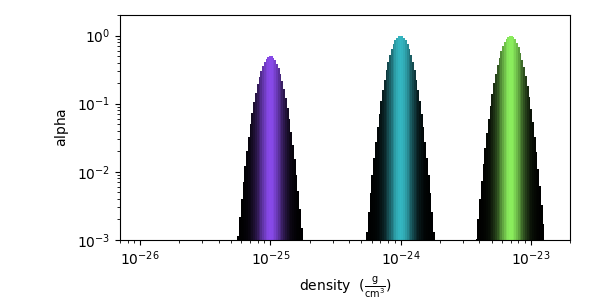

In [25]:
#The grey_opacity call did nothing!  Presumably because I used sample_colormap?
#(I tried also getting rid of alpha and saw no difference between True and False)
Image(filename="transfer_function_gotrue.png")


In [28]:
#Let's see if we can annotate this figure so there is some info!!
#https://yt-project.org/doc/cookbook/complex_plots.html#volume-rendering-with-annotation
scall = yt.create_scene(ds)
source_all = scall[0]
source_all.set_field('density')
source_all.set_log(True)
    
    #cam = scall.add_camera()
scall.camera.set_width(ds.quan(20,'kpc'))
scall.camera.position = ds.arr([0.5,0.5,0.95],'unitary')
scall.camera.focus = ds.arr([0.5,0.5,0.5],'unitary')
scall.camera.north_vector = np.array([0.0,1.0,0.0])
scall.camera.switch_orientation()#Note this step is required because north_vector is not a camera property!
    #scall.camera.resolution = (2048,2048)

bounds = (7e-27,2e-23)
tf = yt.ColorTransferFunction(np.log10(bounds))
tf.sample_colormap(np.log10(1e-25),w=0.01,alpha=0.5,colormap='arbre')
tf.sample_colormap(np.log10(1e-24),w=0.01,colormap='arbre')
tf.sample_colormap(np.log10(7e-24),w=0.01,colormap='arbre')
   
source_all.tfh.tf = tf
source_all.tfh.bounds = bounds
    #source_all.tfh.grey_opacity=False

#These three lines are for the text:
scall.annotate_axes(alpha=.02)
scall.annotate_domain(ds, color=[1, 1, 1, .01])
text_string = "T = {} Gyr".format(float(ds.current_time.to('Gyr')))


#I can't show the annotated version, but I *can* save it!
scall.save_annotated(sigma_clip=50,text_annotate=[[(.1, 0.95), text_string]])
#If I stopped the call at sigma_clip I would still see the transfer function

yt : [INFO     ] 2020-03-24 15:02:45,067 Setting default field to ('gas', 'density')
yt : [INFO     ] 2020-03-24 15:02:45,096 Rendering scene (Can take a while).
yt : [INFO     ] 2020-03-24 15:02:45,105 Creating volume
/Users/stonnesen/Desktop/yt-conda/src/yt-git/yt/units/yt_array.py:1351: RuntimeWarning: invalid value encountered in log10
  out_arr = func(np.asarray(inp), out=out, **kwargs)


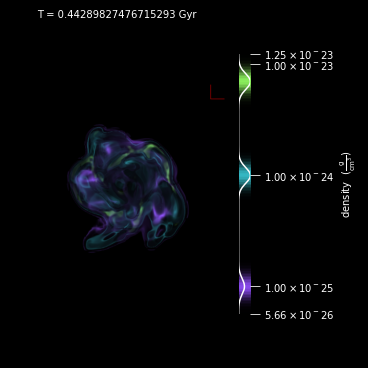

In [29]:
Image(filename="galaxy0030_Render_density.png")